## Prepare mesh

In [1]:
!gmsh mesh.geo -setnumber geomtype 0 -2 -o sibc.msh >& /dev/null
!convert_msh.py sibc.msh sibc.xdmf
!gmsh mesh.geo -setnumber geomtype 1 -2 -o metal.msh >& /dev/null
!convert_msh.py metal.msh metal.xdmf

## Solution preparation

Import BeamImpedance2D module

In [2]:
import logging
import bi2d
from bi2d.materials import vacuum, beam, steel
import numpy as np

Assign material indices. When setting index `-1` to SIBC material, boundary will be applied to all boundaries

In [3]:
beam.index = 1
vacuum.index = 2
steel.index = 3
wall = steel.copy()
wall.index = -1

Setup mesh and materials

In [4]:
m_metal = bi2d.Mesh("metal.xdmf")
m_sibc = bi2d.Mesh("sibc.xdmf")
mc_metal = bi2d.MaterialMap(m_metal, [beam, vacuum, steel])
mc_sibc = bi2d.MaterialMap(m_sibc, [beam, vacuum])

Configure solution

In [5]:
solution_metal = bi2d.Solution(mc_metal, Hcurl_order=2, H1_order=2)
solution_sibc = bi2d.Solution(mc_sibc, Hcurl_order=2, H1_order=2)

## Calculate monopole impedance

Calculate impedance in frequency range and save the results

In [6]:
%%time

data_metal = solution_metal.get_z(np.logspace(1, 13, num=100), beta=0.99999, source_function=bi2d.SourceFunction.MONOPOLE)

CPU times: user 27min 43s, sys: 51.4 s, total: 28min 34s
Wall time: 28min 35s


In [7]:
%%time

data_sibc = solution_sibc.get_z(np.logspace(1, 13, num=100), beta=0.99999, source_function=bi2d.SourceFunction.MONOPOLE, sibc=[wall])

CPU times: user 17min 33s, sys: 33.3 s, total: 18min 7s
Wall time: 18min 9s


## Plot monopole impedance

In [8]:
import pylab
pylab.rcParams['figure.figsize'] = [12, 8]

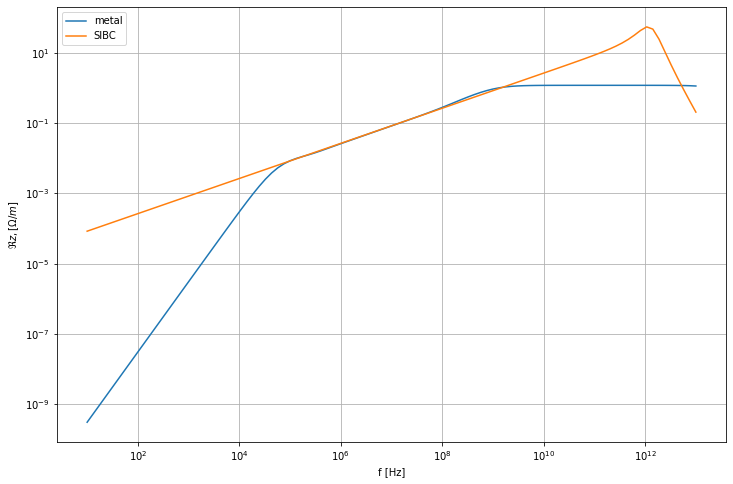

In [9]:
pylab.plot(data_metal[:,0], data_metal[:,1])
pylab.plot(data_sibc[:,0], data_sibc[:,1])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f [Hz]")
pylab.ylabel(r"$\Re{z}, [\Omega/m]$")
pylab.grid()
pylab.legend(["metal", "SIBC"])
pylab.show()

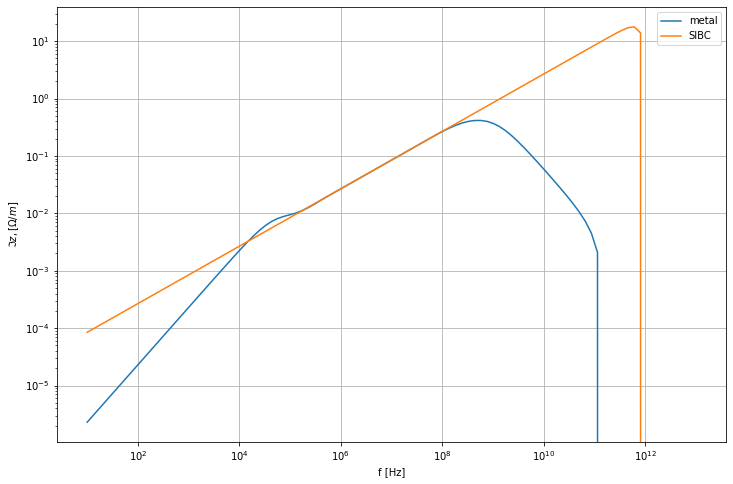

In [10]:
pylab.plot(data_metal[:,0], data_metal[:,2])
pylab.plot(data_sibc[:,0], data_sibc[:,2])
pylab.xscale("log")
pylab.yscale("log")
pylab.xlabel("f [Hz]")
pylab.ylabel(r"$\Im{z}, [\Omega/m]$")
pylab.grid()
pylab.legend(["metal", "SIBC"])
pylab.show()

## Calculate dipole impedance

In [11]:
%%time

data_metal = solution_metal.get_z(np.logspace(1, 13, num=100), beta=0.99999, source_function=bi2d.SourceFunction.DIPOLE)

CPU times: user 27min 5s, sys: 48.9 s, total: 27min 54s
Wall time: 27min 55s


In [12]:
%%time

data_sibc = solution_sibc.get_z(np.logspace(1, 13, num=100), beta=0.99999, source_function=bi2d.SourceFunction.DIPOLE, sibc=[wall])

CPU times: user 16min 32s, sys: 30.3 s, total: 17min 2s
Wall time: 17min 3s


## Plot dipole impedance

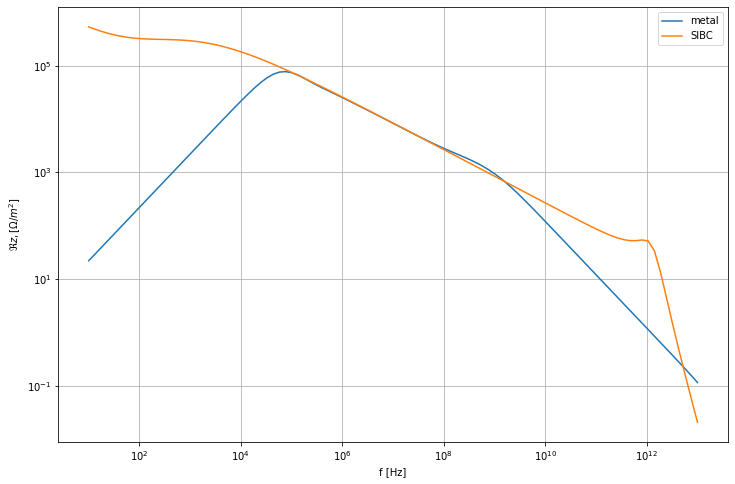

In [13]:
pylab.plot(data_metal[:,0], data_metal[:,1])
pylab.plot(data_sibc[:,0], data_sibc[:,1])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f [Hz]")
pylab.ylabel(r"$\Re{z}, [\Omega/m^2]$")
pylab.grid()
pylab.legend(["metal", "SIBC"])
pylab.show()

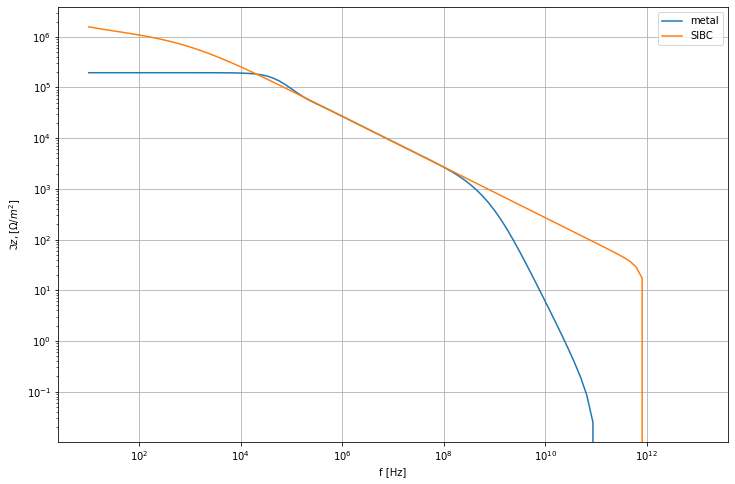

In [14]:
pylab.plot(data_metal[:,0], data_metal[:,2])
pylab.plot(data_sibc[:,0], data_sibc[:,2])
pylab.xscale("log")
pylab.yscale("log")
pylab.xlabel("f [Hz]")
pylab.ylabel(r"$\Im{z}, [\Omega/m^2]$")
pylab.grid()
pylab.legend(["metal", "SIBC"])
pylab.show()